**Why don't you add the other feature and mess around with  kk  and weighting to see if you can do any better than we've done so far?**

In the unweighted and weighted models I switched loudness out for duration. In doing so I had to change the prediction line value from 30 to 400. 

**Loudness:**
Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)

**Duration:**
Unweighted Accuracy: -0.44 (+/- 0.81)
Weighted Accuracy: -0.78 (+/- 0.77)

The duration model is slightly better with unweighted value of -0.44 and weight of -0.78. However the (+/-) error is much higher in the unweighted test.  

In [91]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

**Descriptive stats**

In [92]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


**Seaborn Heatmap correlation**

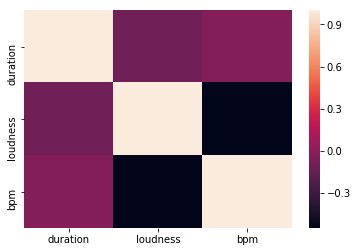

In [93]:
sns.heatmap(music.corr())

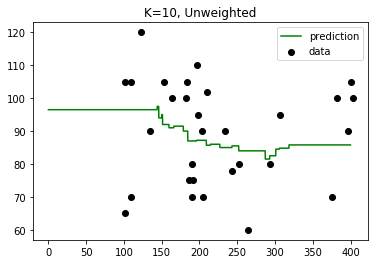

In [94]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

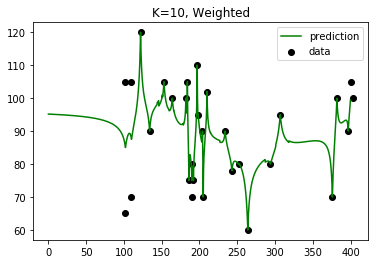

In [95]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.44 (+/- 0.81)
Weighted Accuracy: -0.78 (+/- 0.77)


**Standardize variables, train test split, using KNN**

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
import seaborn as sns


In [100]:
scaler.fit(music.drop('bpm',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
scaled_features = scaler.transform(music.drop('bpm',axis=1))

In [102]:
mu_feat = pd.DataFrame(scaled_features,columns=music.columns[:-1])
mu_feat.head()

,duration,loudness
0,-0.427340,-0.340628
1,-0.975680,1.056819
2,0.219702,1.842883
3,-0.405406,1.231500
4,-1.107282,0.008734


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,music['bpm'],
                                                    test_size=0.30)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [108]:
pred = knn.predict(X_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(confusion_matrix(y_test,pred))

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]]


**Predictions and Evaluations**

Use the predict method to predict values using your KNN model and x_test. 

Create a confusion matrix and classification report.


In [111]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

         60       0.00      0.00      0.00         0
         65       0.00      0.00      0.00         0
         70       0.00      0.00      0.00         2
         75       0.00      0.00      0.00         1
         80       0.00      0.00      0.00         2
         90       0.00      0.00      0.00         2
        100       0.00      0.00      0.00         0
        105       1.00      1.00      1.00         1
        110       0.00      0.00      0.00         1

avg / total       0.11      0.11      0.11         9



C:\Users\mille\Conda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mille\Conda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
